<a href="https://colab.research.google.com/github/VictorFrancheto/Complex_Network/blob/main/lista_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalando a biblioteca `graph-tool`(https://graph-tool.skewed.de)


In [1]:
!mkdir -p /etc/apt/keyrings; mkdir -p ~/.gnupg; chmod 700 ~/.gnupg
!gpg --no-default-keyring --keyring /etc/apt/keyrings/skewed.de.gpg --keyserver keyserver.ubuntu.com --recv-keys 612DEFB798507F25
!echo "deb [signed-by=/etc/apt/keyrings/skewed.de.gpg] https://downloads.skewed.de/apt $(lsb_release -s -c) main" > /etc/apt/sources.list.d/skewed.list
!apt-get update
!apt-get install python3-graph-tool python3-matplotlib python3-cairo

gpg: keybox '/etc/apt/keyrings/skewed.de.gpg' created
gpg: /root/.gnupg/trustdb.gpg: trustdb created
gpg: key 612DEFB798507F25: public key "Tiago de Paula Peixoto <tiago@skewed.de>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Ign:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:8 https://downloads.skewed.de/apt jammy InRelease [7,536 B]
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:11 https://r2u

In [2]:
# O Colab usa uma instalação Python diferente da do sistema! Colaboração ruim! Precisamos de algumas soluções alternativas.
!apt purge python3-cairo
!apt install libcairo2-dev pkg-config python3-dev
!pip install --force-reinstall pycairo
!pip install zstandard

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following packages will be REMOVED:
  python3-cairo*
0 upgraded, 0 newly installed, 1 to remove and 55 not upgraded.
After this operation, 310 kB disk space will be freed.
(Reading database ... 131995 files and directories currently installed.)
Removing python3-cairo:amd64 (1.20.1-3build1) ...
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python3-dev is already the newest version (3.10.6-1~22.04.1).
python3-dev set to manually installed.
The following packages were automatically installed and are no longer required:
  libbz2-dev libpkgconf3 libreadline-dev
Use 'apt autoremove' to remove them.
The following additional packages will be installed:
  libblkid-dev libblkid1 libcairo-script-interpreter2 libffi-dev libglib2.0-dev libglib2.0-dev-bin
  libice-dev liblzo2-2 libmount-dev libmount1 libpixman-1-dev libselinux1-dev libsepol-dev
  lib

### Agora podemos usar a ferramenta gráfica como qualquer outro módulo Python

In [3]:
import graph_tool.all as gt

# Redes Complexas
---

Redes selecionadas:

https://networks.skewed.de/net/faa_routes

**Descrição:**
Uma rede de rotas de tráfego aéreo, extraída do banco de dados de rotas preferenciais do NFDC (National Flight Data Center) da FAA (Administração Federal de Aviação) (www.fly.faa.gov). A data de extração é anterior a 2010. Os nós representam aeroportos ou centros de serviço, e uma aresta direcionada é a rota preferencial entre o aeroporto i e o aeroporto j.

**Citação:** United States Federal Aviation Administration, "Air traffic control system command center.", http://www.fly.faa.gov/ (2010)

----

https://networks.skewed.de/net/bitcoin_alpha

**Descrição:** Uma rede de relacionamentos de quem-confia-em-quém entre os usuários da plataforma **Bitcoin Alpha**. Cada aresta direcionada $(i, j, w)$ representa a avaliação do usuário $j$ pelo usuário $i$, na qual $i$ atribui a $j$ um peso $w$ em uma escala de $-10$ (total desconfiança) a $+10$ (total confiança) em passos de $1,1$.

**Citação:**
S. Kumar, F. Spezzano, V.S. Subrahmanian, and C. Faloutsos, "Edge weight prediction in weighted signed networks." IEEE 16th International Conference on Data Mining (ICDM), 221-230 (2016), https://doi.org/10.1109/icdm.2016.0033 [@sci-hub]

---
https://networks.skewed.de/net/7th_graders


**Descrição:** Uma pequena rede complexa de amizades entre $29$ alunos do sétimo ano em Victoria, Austrália. Os alunos indicaram colegas para três atividades diferentes (com quem você se dá bem na classe, quem são seus melhores amigos e com quem você preferiria trabalhar). A direção da aresta para cada um desses três tipos de arestas indica se o nó $i$ nomeou o nó $j$, e o peso da aresta indica a frequência dessa nomeação. Os alunos de 1 a 12 são meninos e os de 13 a 29 são meninas.

**Citação:** M. Vickers and S. Chan, "Representing Classroom Social Structure." Melbourne: Victoria Institute of Secondary Education, (1981)

----

https://networks.skewed.de/net/urban_streets

**Descrição:** Redes urbanas de ruas, correspondentes a mapas de 1 milha quadrada de 20 cidades ao redor do mundo.

**Citação:** P. Crucitti, V. Latora, and S. Porta. "Centrality measures in spatial networks of urban streets". Phys. Rev. E 73 (2006), 036125, https://doi.org/10.1103/PhysRevE.73.036125 [@sci-hub].

V. Latora, V. Nicosia, G. Russo, "Complex Networks: Principles, Methods and Applications", Cambridge University Press (2017), https://doi.org/10.1017/9781316216002 [@sci-hub]


### Importando bibliotecas

In [4]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import spearmanr

#### Lendo as redes selecionadas

In [9]:
def process_graph(graph_name, directed=True):
    """
    Processa um grafo da coleção Graph-tool, convertendo-o para um grafo NetworkX,
    removendo auto-laços e imprimindo o número de nós e arestas.

    Parâmetros:
    graph_name (str): Nome do grafo na coleção Graph-tool.
    directed (bool): Se True, cria um grafo direcionado; se False, cria um grafo não direcionado.
    """
    # Carregar o grafo do graph-tool
    G_gt = gt.collection.ns[graph_name]

    # Criar um grafo vazio do NetworkX, direcionado ou não
    G_nx = nx.DiGraph() if directed else nx.Graph()

    # Adicionar arestas do grafo do Graph-tool para o grafo do NetworkX
    for edge in G_gt.edges():
        G_nx.add_edge(edge.source(), edge.target())

    # Remover auto-laços
    G_nx.remove_edges_from(nx.selfloop_edges(G_nx))

    # Imprimir o número de nós e arestas
    print(f"Grafo: {graph_name}")
    print("Número de nós:", G_nx.number_of_nodes())
    print("Número de arestas:", G_nx.number_of_edges())

    return G_nx  # Retorna o grafo processado

# Processar os grafos direcionados
G_jazz = process_graph("jazz_collab", directed=False)
G_facebook = process_graph("facebook_organizations/S1", directed=False)


Grafo: jazz_collab
Número de nós: 198
Número de arestas: 2742
Grafo: facebook_organizations/S1
Número de nós: 320
Número de arestas: 2369


#### Plotando as redes

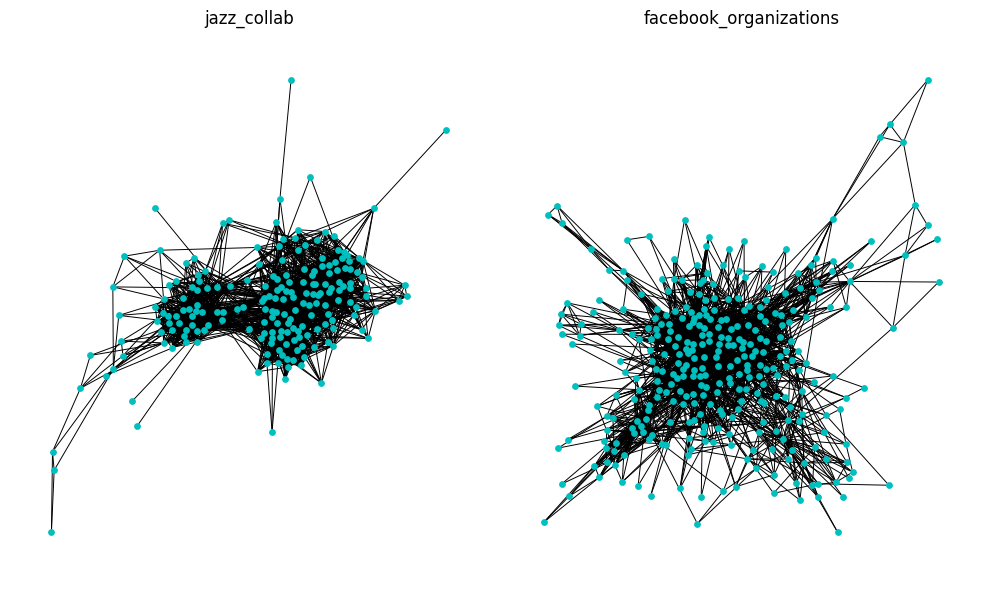

In [14]:
def plot_graph(G_nx, ax, title):
    """
    Função para plotar um grafo em um eixo específico.

    Parâmetros:
    G_nx (networkx.Graph): O grafo a ser plotado.
    ax (matplotlib.Axes): O eixo onde o grafo será plotado.
    title (str): O título do grafo.
    """
    pos = nx.spring_layout(G_nx)  # Definir a disposição do grafo
    nx.draw(
        G_nx, pos,
        ax=ax,
        with_labels=False,  # Sem rótulos
        node_color='c',  # Nós na cor azul claro
        edge_color='black',  # Arestas na cor preta
        node_size=15,
        width=0.7,
        font_size=5,
        font_weight='bold',
        arrows=True  # Exibir setas
    )
    ax.set_title(title)  # Título do subplot

# Criar uma figura com subplots 1x2
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Plotar os grafos nos subplots
plot_graph(G_jazz, axes[0], "jazz_collab")
plot_graph(G_facebook, axes[1], "facebook_organizations")

# Ajustar espaçamento entre os subplots
plt.tight_layout()
plt.show()


**Exercício 1.**  Considere uma das medidas de similaridade estrutural. Mostre a distribuição de similaridade entre todos os pares de vértices (histograma dos valores de similares considerando todos os pares de vértices).